# CIS465 Aurubis Project

## Descriptive Analysis

In [2]:
# Import Packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas import DataFrame
import functools
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import datetime
# Make it possible to print multiple results at one cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

/Users/andylin/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
# load data 
df = pd.read_csv('Arubis.csv')
df_new = df.copy()

# drop cell with null
df_new = df.dropna()

# group by order Id
df_gb = df_new.groupby('Coil Id').mean()

# group by Machine Sequence
df_gb1 = df_new.groupby("Machine Sequence").mean()
df_gb1.reset_index(inplace = True)
df_gb1 = df_gb1[df_gb1['Actual Yield']<=1]

(0, 15)

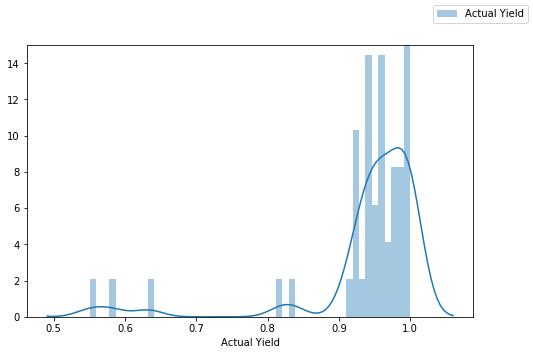

In [41]:
# plot - Distribution of Actual Yield
fig = plt.figure(figsize=(8,5))
sns.distplot(df_gb1['Actual Yield'], bins=50, kde = True, rug = False, norm_hist = True)
fig.legend(labels=['Actual Yield'])
plt.ylim(0,15)
plt.show()

# plot - Distribution of Start Width
df_gbn = df_gb[df_gb['Start Width']>=20]
fig = plt.figure(figsize=(8,5))
sns.distplot(df_gbn['Start Width'], bins= 50, kde = True, rug = False)
fig.legend(labels=['Start Width'])
plt.show()

# plot - distribution of Alloy
fig = plt.figure(figsize=(8,5))
sns.distplot(df_gb['Alloy Type'], bins = 50, kde = True, rug = False)
fig.legend(labels=['Alloy Type'])
plt.show()

# Jointplot 
sns.jointplot(x='Alloy Type',y='Start Width', data = df_gb, kind = 'hex',marginal_kws=dict(bins=50, rug=True))

<Figure size 1440x360 with 0 Axes>

(0, 1.1)

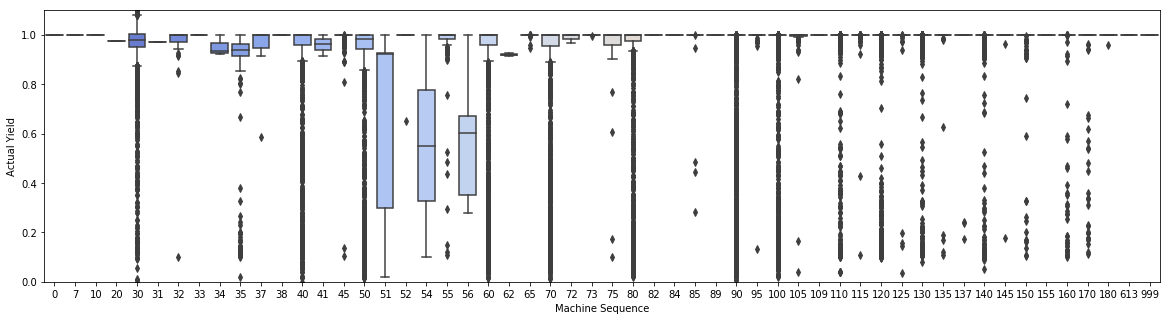

In [5]:
# Boxplot - Machine Sequence and Actual Yield
plt.figure(figsize=(20,5))
a = sns.boxplot(x="Machine Sequence", y="Actual Yield",data=df_new, palette="coolwarm")
plt.ylim(0,1.1)

# Boxplot - Machine Sequence and Standard Yield
plt.figure(figsize=(20,5))
b = sns.boxplot(x="Machine Id", y= "Actual Yield", data=df_new, palette="coolwarm")
plt.ylim(0,1.1)